Saving 02b7b018-0fed-44c2-a9c2-93b2b3952efc_sam_masked.png to 02b7b018-0fed-44c2-a9c2-93b2b3952efc_sam_masked (3).png
Alpha channel detected. Converting to grayscale.


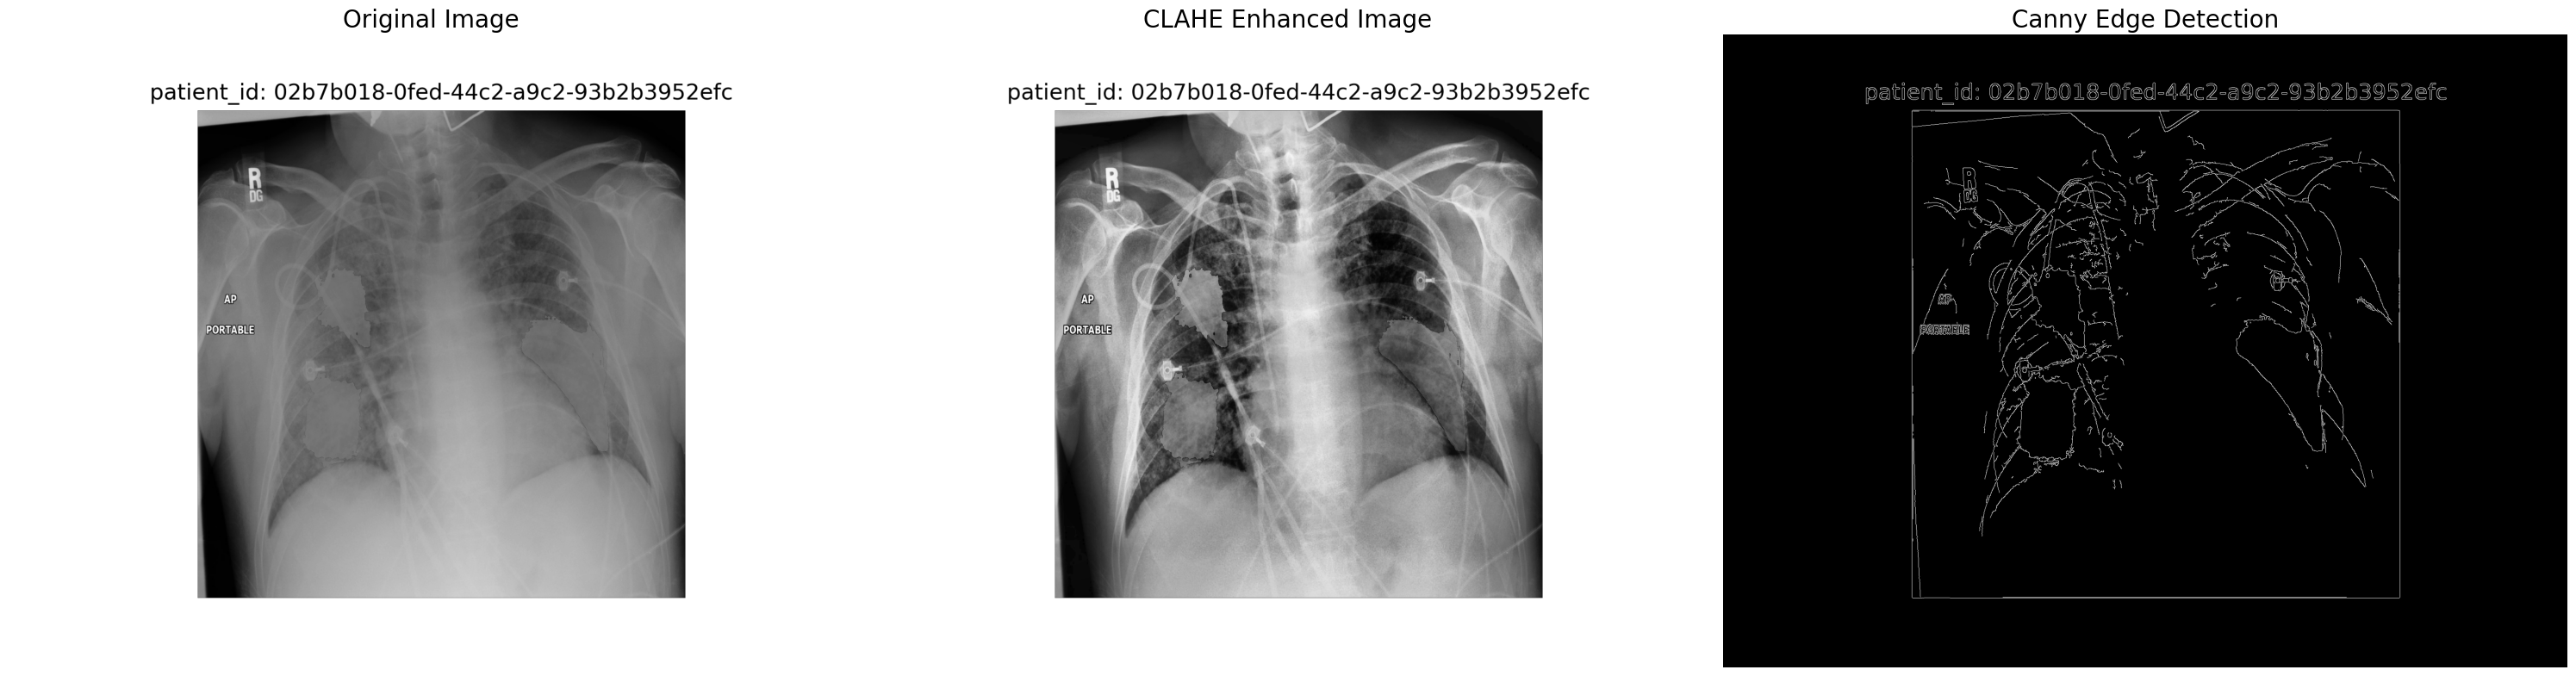

Original Image Mean Intensity: 191.53 ± 0.09 (95% CI)
CLAHE Image Mean Intensity: 196.57 ± 0.09 (95% CI)
Proportion of Edge Pixels: 0.0144 ± 0.0001 (95% CI)


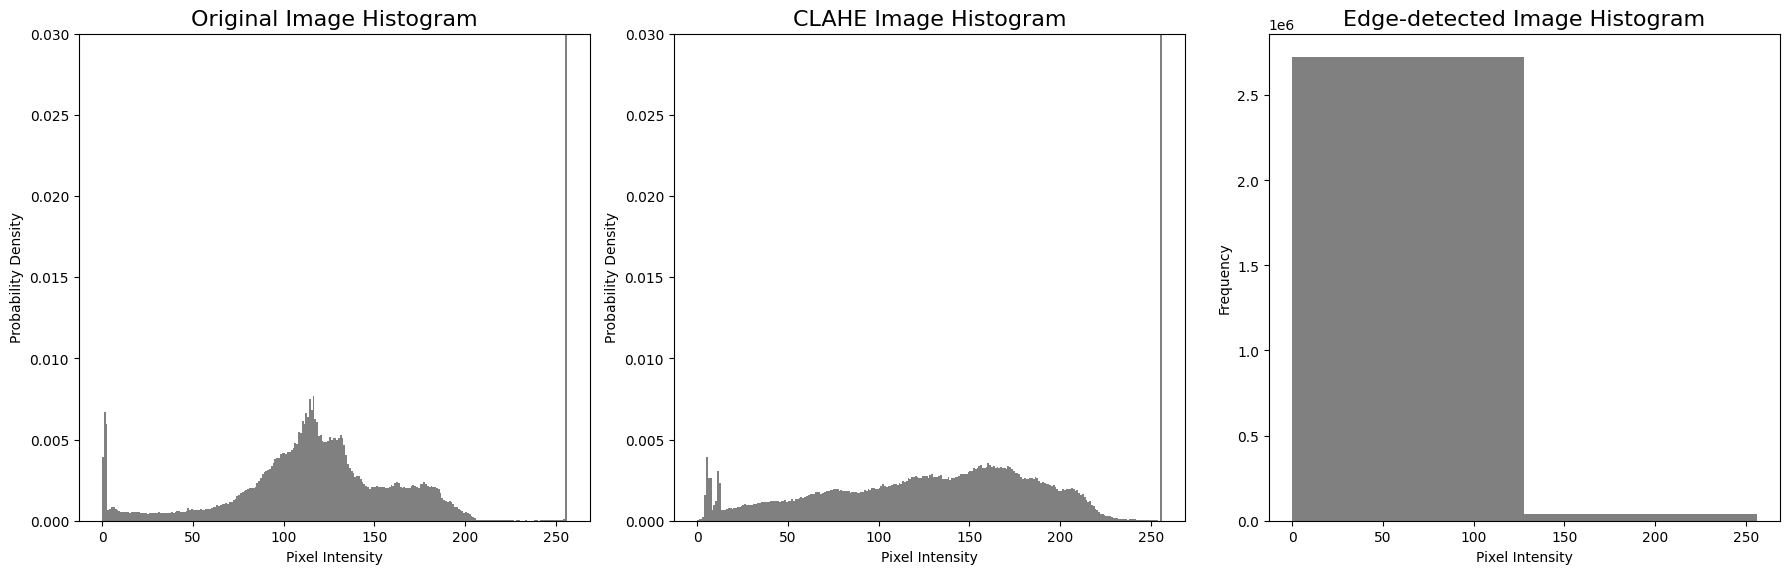

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import stats

# Step 1: Upload the image from your PC
uploaded = files.upload()

# Step 2: Retrieve the filename of the uploaded image
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Step 3: Load the uploaded image
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load the image with all channels

# Step 4: Check for Alpha Channel and Convert to Grayscale if necessary
if len(image.shape) == 3 and image.shape[2] == 4:
    # If the image has an alpha channel, convert to grayscale
    print("Alpha channel detected. Converting to grayscale.")
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
elif len(image.shape) == 3:
    # If the image has no alpha channel but is colored, convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 5: Convert the image to the appropriate data type if necessary
if image.dtype != 'uint8':
    image = image.astype(np.uint8)

# Step 6: Apply CLAHE with higher clipLimit to increase contrast more aggressively
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))  # Increased clipLimit to 5.0 for more contrast
clahe_image = clahe.apply(image)

# Step 7: Apply Canny Edge Detection with optimized thresholds
edges = cv2.Canny(clahe_image, threshold1=80, threshold2=180)  # Increase lower threshold to 80, upper to 180

# Step 8: Display the Original, CLAHE-enhanced, and Edge-detected Images with larger display size
plt.figure(figsize=(30, 12))  # Increase the figure size for larger display

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image", fontsize=20)  # Increase font size for better readability
plt.imshow(image, cmap='gray')
plt.axis('off')

# CLAHE Image
plt.subplot(1, 3, 2)
plt.title("CLAHE Enhanced Image", fontsize=20)
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

# Canny Edges Image
plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection", fontsize=20)
plt.imshow(edges, cmap='gray')
plt.axis('off')

# Show all images
plt.tight_layout()  # Reduce padding between subplots
plt.show()

# Step 9: Compute and display evaluation metrics

# For Original Image
orig_pixels = image.flatten()
orig_mean = np.mean(orig_pixels)
orig_std = np.std(orig_pixels, ddof=1)  # Use ddof=1 for sample standard deviation
n_orig = len(orig_pixels)
z = stats.norm.ppf(0.975)  # For 95% confidence interval

orig_ci = z * (orig_std / np.sqrt(n_orig))
print(f"Original Image Mean Intensity: {orig_mean:.2f} ± {orig_ci:.2f} (95% CI)")

# For CLAHE Image
clahe_pixels = clahe_image.flatten()
clahe_mean = np.mean(clahe_pixels)
clahe_std = np.std(clahe_pixels, ddof=1)
n_clahe = len(clahe_pixels)

clahe_ci = z * (clahe_std / np.sqrt(n_clahe))
print(f"CLAHE Image Mean Intensity: {clahe_mean:.2f} ± {clahe_ci:.2f} (95% CI)")

# For Edge-detected Image
# Edge pixels are pixels with value > 0
edge_pixels = edges.flatten()
n_edges = np.count_nonzero(edge_pixels)
n_total = len(edge_pixels)
p_edge = n_edges / n_total
edge_se = np.sqrt(p_edge * (1 - p_edge) / n_total)
edge_ci = z * edge_se
print(f"Proportion of Edge Pixels: {p_edge:.4f} ± {edge_ci:.4f} (95% CI)")

# Additionally, display histograms of pixel intensities with adjusted scales
plt.figure(figsize=(18, 6))

# Histogram of Original Image
plt.subplot(1, 3, 1)
plt.hist(orig_pixels, bins=256, range=(0, 256), color='gray', density=True)
plt.title("Original Image Histogram", fontsize=16)
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability Density")
plt.ylim(0, 0.03)  # Adjust y-axis limit as needed

# Histogram of CLAHE Image
plt.subplot(1, 3, 2)
plt.hist(clahe_pixels, bins=256, range=(0, 256), color='gray', density=True)
plt.title("CLAHE Image Histogram", fontsize=16)
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability Density")
plt.ylim(0, 0.03)  # Adjust y-axis limit as needed

# Histogram of Edge-detected Image
plt.subplot(1, 3, 3)
plt.hist(edge_pixels, bins=2, range=(0, 256), color='gray')
plt.title("Edge-detected Image Histogram", fontsize=16)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
